In [1]:
import numpy as np
import matplotlib.pyplot as plt

import uproot
import awkward as ak


from sklearn.model_selection import train_test_split

In [2]:
plt.rc('font', size=14)

In [3]:
# Function to calculate weights analytically

def weight_fn(thetas, angles):
    theta0, theta1, theta2 = thetas[0], thetas[1], thetas[2]
    phi, costh = angles[:, 0], angles[:, 1]
    weight = 1. + theta0* costh * costh + 2.* theta1* costh * np.sqrt(1. - costh * costh) * np.cos(phi) + 0.5* theta2* (1. - costh * costh)* np.cos(2. * phi)
    return weight / (1. + costh * costh)

In [4]:
tree = uproot.open("BMFData.root:save")
events = tree.arrays(["mass", "pT", "xF", "phi", "costh", "true_phi", "true_costh"])

X_data = np.array([(mass, pT, xF, phi, costh, true_phi, true_costh) for mass, pT, xF, phi, costh, true_phi, true_costh in zip(
    events.mass, events.pT, events.xF, events.phi, events.costh, events.true_phi, events.true_costh
)])

In [5]:
X_train, X_test = train_test_split(X_data, test_size=0.3, shuffle=True)

In [6]:
X0_train, X1_train = train_test_split(X_train, test_size=0.5, shuffle=True)

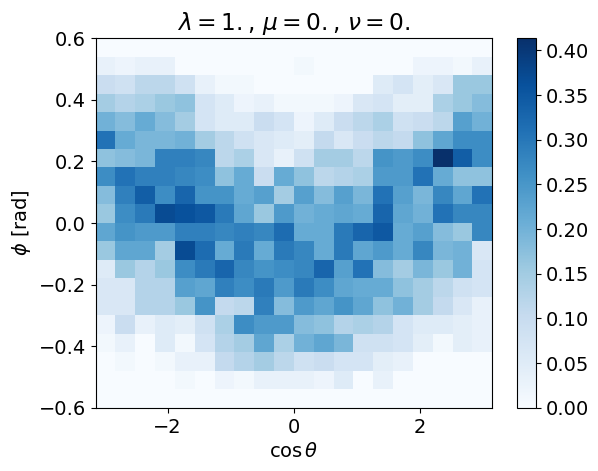

In [7]:
binx = np.linspace(-np.pi, np.pi, 21)
biny = np.linspace(-0.6, 0.6, 21)


fig, ax = plt.subplots()
hh = ax.hist2d(X0_train[:, 3][:5000], X0_train[:, 4][:5000], bins=[binx, biny], density=True, cmap="Blues")
fig.colorbar(hh[3], ax=ax)
ax.set_title(r"$\lambda = 1.$, $\mu = 0.$, $\nu = 0.$")
ax.set_ylabel(r"$\phi$ [rad]")
ax.set_xlabel(r"$\cos\theta$")
plt.show()

In [8]:
nhist = 50000
nevents = 5000

X0_tree = {"hist": [], "thetas": [], "label": []}
X1_tree = {"hist": [], "thetas": [], "label": []}
test_X0 = {"hist": [], "thetas": [], "label": []}
test_X1 = {"hist": [], "thetas": [], "label": []}

theta0 = np.random.uniform(0. ,2., nhist)
theta1 = np.random.uniform(-1., 1., nhist)
theta2 = np.random.uniform(-1., 1., nhist)

for i in range(nhist):
    # X1 events
    counts, other = train_test_split(X1_train, train_size=nevents, shuffle=True)
    weights = weight_fn([theta0[i], theta1[i], theta2[i]], counts[:, 5:])
    H, xedges, yedges = np.histogram2d(counts[:, 3], counts[:, 4], bins=(binx, biny), weights=weights, density=True)
    X1_tree["hist"].append([H])
    X1_tree["thetas"].append([theta0[i], theta1[i], theta2[i]])
    X1_tree["label"].append([0., 1.])
    
    # X0 events
    counts, other = train_test_split(X0_train, train_size=nevents, shuffle=True)
    weights = weight_fn([1., 0., 0.], counts[:, 5:])
    H, xedges, yedges = np.histogram2d(counts[:, 3], counts[:, 4], bins=(binx, biny), weights=weights, density=True)
    X0_tree["hist"].append([H])
    X0_tree["thetas"].append([theta0[i], theta1[i], theta2[i]])
    X0_tree["label"].append([1., 0.])
    
    if i%10**3 == 0:
        print("===> {} histograms are done ...".format(i))
        

X0_tree["hist"] = np.array(X0_tree["hist"])
X0_tree["thetas"] = np.array(X0_tree["thetas"])
X0_tree["label"] = np.array(X0_tree["label"])

X1_tree["hist"] = np.array(X1_tree["hist"])
X1_tree["thetas"] = np.array(X1_tree["thetas"])
X1_tree["label"] = np.array(X1_tree["label"])

===> 0 histograms are done ...
===> 1000 histograms are done ...
===> 2000 histograms are done ...
===> 3000 histograms are done ...
===> 4000 histograms are done ...
===> 5000 histograms are done ...
===> 6000 histograms are done ...
===> 7000 histograms are done ...
===> 8000 histograms are done ...
===> 9000 histograms are done ...
===> 10000 histograms are done ...
===> 11000 histograms are done ...
===> 12000 histograms are done ...
===> 13000 histograms are done ...
===> 14000 histograms are done ...
===> 15000 histograms are done ...
===> 16000 histograms are done ...
===> 17000 histograms are done ...
===> 18000 histograms are done ...
===> 19000 histograms are done ...
===> 20000 histograms are done ...
===> 21000 histograms are done ...
===> 22000 histograms are done ...
===> 23000 histograms are done ...
===> 24000 histograms are done ...
===> 25000 histograms are done ...
===> 26000 histograms are done ...
===> 27000 histograms are done ...
===> 28000 histograms are done ..

In [9]:
ntest = 20000

# theta0 = np.random.uniform(0. ,2., ntest)
# theta1 = np.random.uniform(-1., 1., ntest)
# theta2 = np.random.uniform(-1., 1., ntest)

X0_test, X1_test = train_test_split(X_test, test_size=0.5, shuffle=True)

for i in range(ntest):
    # test events lambda = 0.8, mu = -0.1, nu = 0.2
    theta0, theta1, theta2 = 0.8, -0.1, 0.2
    counts, other = train_test_split(X1_test, train_size=nevents, shuffle=True)
    # weights = weight_fn([theta0[i], theta1[i], theta2[i]], counts[:, 5:])
    weights = weight_fn([theta0, theta1, theta2], counts[:, 5:])
    H, xedges, yedges = np.histogram2d(counts[:, 3], counts[:, 4], bins=(binx, biny), weights=weights, density=True)
    test_X1["hist"].append([H])
    test_X1["thetas"].append([theta0, theta1, theta2])
    test_X1["label"].append([0., 1.])

    theta0, theta1, theta2 = 1., 0., 0.
    counts, other = train_test_split(X0_test, train_size=nevents, shuffle=True)
    # weights = weight_fn([theta0[i], theta1[i], theta2[i]], counts[:, 5:])
    weights = weight_fn([theta0, theta1, theta2], counts[:, 5:])
    H, xedges, yedges = np.histogram2d(counts[:, 3], counts[:, 4], bins=(binx, biny), weights=weights, density=True)
    test_X0["hist"].append([H])
    test_X0["thetas"].append([theta0, theta1, theta2])
    test_X0["label"].append([1., 0.])
    
    if i%5000 == 0:
        print("===> {} histograms are done ...".format(i))

test_X0["hist"] = np.array(test_X0["hist"])
test_X0["thetas"] = np.array(test_X0["thetas"])
test_X0["label"] = np.array(test_X0["label"])
test_X1["hist"] = np.array(test_X1["hist"])
test_X1["thetas"] = np.array(test_X1["thetas"])
test_X1["label"] = np.array(test_X1["label"])

===> 0 histograms are done ...
===> 5000 histograms are done ...
===> 10000 histograms are done ...
===> 15000 histograms are done ...


In [10]:
# Save output file

outfile = uproot.recreate("MCHist.root", compression=uproot.ZLIB(4))
outfile["X0_train"] = X0_tree
outfile["X1_train"] = X1_tree
outfile["X0_test"] = test_X0
outfile["X1_test"] = test_X1

outfile.close()